1.Overview of Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


2.Objective

The primary objective is to build a machiene learning model to predict the customerr behaviour using bank data.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

In [2]:
data= pd.read_csv("bank-full.csv",sep =";")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Data preprocessing and cleaning

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.shape

(45211, 17)

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
data.drop(columns =["day","month"],axis =1,inplace =True)

In [10]:
data.shape

(45211, 15)

<Axes: >

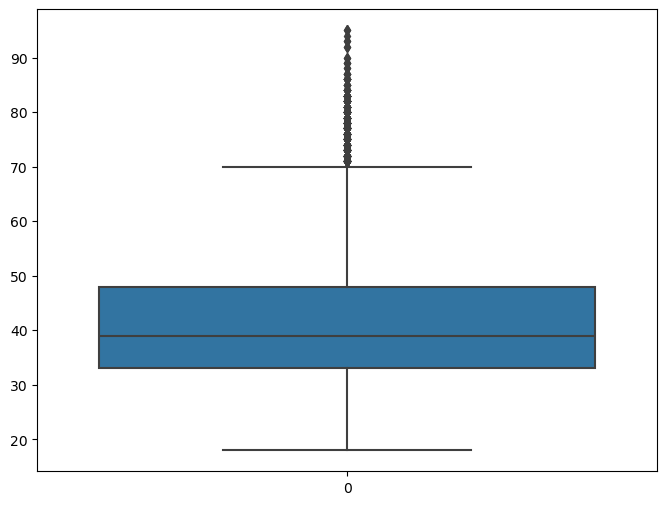

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data["age"])

In [12]:
data2=data[(data["age"]>48)]

In [13]:
data2

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,50,1,-1,0,unknown,no
12,53,technician,married,secondary,no,6,yes,no,unknown,517,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71,yes,no,unknown,71,1,-1,0,unknown,no
14,57,services,married,secondary,no,162,yes,no,unknown,174,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,300,1,40,8,failure,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes


Text(0, 0.5, 'count')

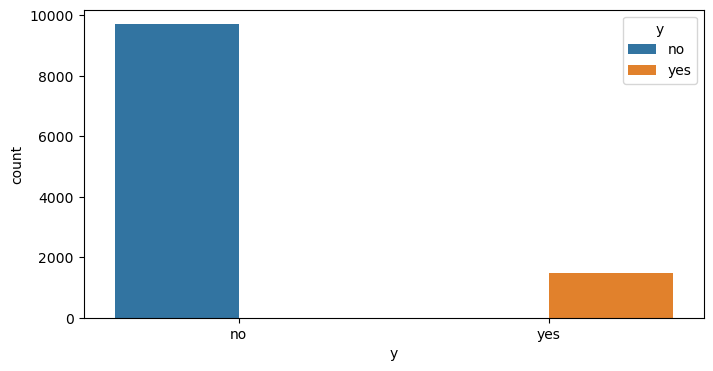

In [14]:
plt.figure(figsize= (8,4))
sns.countplot(x='y', hue='y', data=data2)
plt.xlabel("y")
plt.ylabel("count")

In [15]:
data2["y"].value_counts()

y
no     9702
yes    1486
Name: count, dtype: int64

In [16]:
data3=data[(data["age"]<33)]

Text(0, 0.5, 'count')

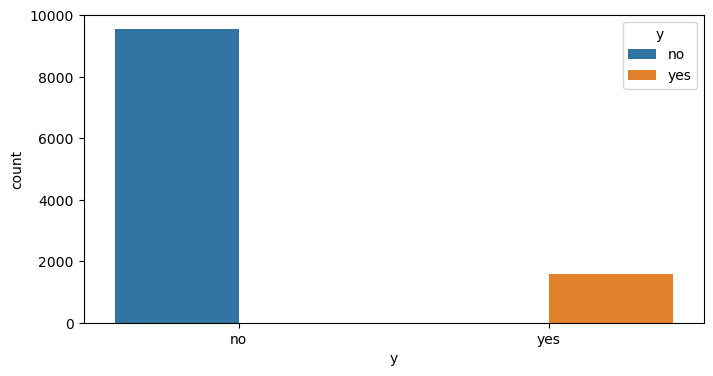

In [17]:
plt.figure(figsize= (8,4))
sns.countplot(x='y', hue='y', data=data3)
plt.xlabel("y")
plt.ylabel("count")

In [18]:
data3["y"].value_counts()

y
no     9539
yes    1572
Name: count, dtype: int64

In [19]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [20]:
data["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [22]:
data['default'] = pd.get_dummies(data['default'],dtype=int,drop_first=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int32(1), int64(6), object(8)
memory usage: 5.0+ MB


In [24]:
data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [25]:
data_single=data[(data["marital"]=="single")]

In [26]:
data_single["y"].value_counts()

y
no     10878
yes     1912
Name: count, dtype: int64

In [27]:
data_divorced=data[(data["marital"]=="divorced")]

In [28]:
data_divorced["y"].value_counts()

y
no     4585
yes     622
Name: count, dtype: int64

In [29]:
data_married=data[(data["marital"]=="married")]

In [30]:
data_married["y"].value_counts()

y
no     24459
yes     2755
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le_marital = LabelEncoder()
data['marital'] = le_marital.fit_transform(data['marital'])

In [32]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,2,secondary,0,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,1,secondary,0,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,1,unknown,0,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,2,unknown,0,1,no,no,unknown,198,1,-1,0,unknown,no


In [33]:
data["marital"].unique()

array([1, 2, 0])

In [34]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [35]:
data.drop(columns="job",axis=1,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   marital    45211 non-null  int32 
 2   education  45211 non-null  object
 3   default    45211 non-null  int32 
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   duration   45211 non-null  int64 
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
dtypes: int32(2), int64(6), object(6)
memory usage: 4.5+ MB


In [37]:
data["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [38]:
le_education=LabelEncoder()

In [39]:
data["education"]=le_education.fit_transform(data["education"])

In [40]:
data["education"].unique()

array([2, 1, 3, 0])

In [41]:
data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [42]:
data['housing'] = pd.get_dummies(data['housing'],dtype=int,drop_first=True)

In [43]:
data["housing"].unique()

array([1, 0])

In [44]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [45]:
data["loan"]=pd.get_dummies(data["loan"],dtype=int,drop_first=True)

In [46]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [47]:
data_contact=data.groupby("contact")["y"].value_counts().reset_index()

In [48]:
data_contact

,contact,y,count
0,cellular,no,24916
1,cellular,yes,4369
2,telephone,no,2516
3,telephone,yes,390
4,unknown,no,12490
5,unknown,yes,530


In [49]:
le_contact=LabelEncoder()

In [50]:
data["contact"]=le_contact.fit_transform(data["contact"])

In [51]:
data["duration"].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [52]:
le_poutcome=LabelEncoder()

In [53]:
data["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [54]:
data["poutcome"]=le_poutcome.fit_transform(data["poutcome"])

In [55]:
data["y"].unique()

array(['no', 'yes'], dtype=object)

In [56]:
data["y"]=pd.get_dummies(data["y"],dtype=int,drop_first=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   marital    45211 non-null  int32
 2   education  45211 non-null  int32
 3   default    45211 non-null  int32
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int32
 6   loan       45211 non-null  int32
 7   contact    45211 non-null  int32
 8   duration   45211 non-null  int64
 9   campaign   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  poutcome   45211 non-null  int32
 13  y          45211 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.4 MB


<Axes: >

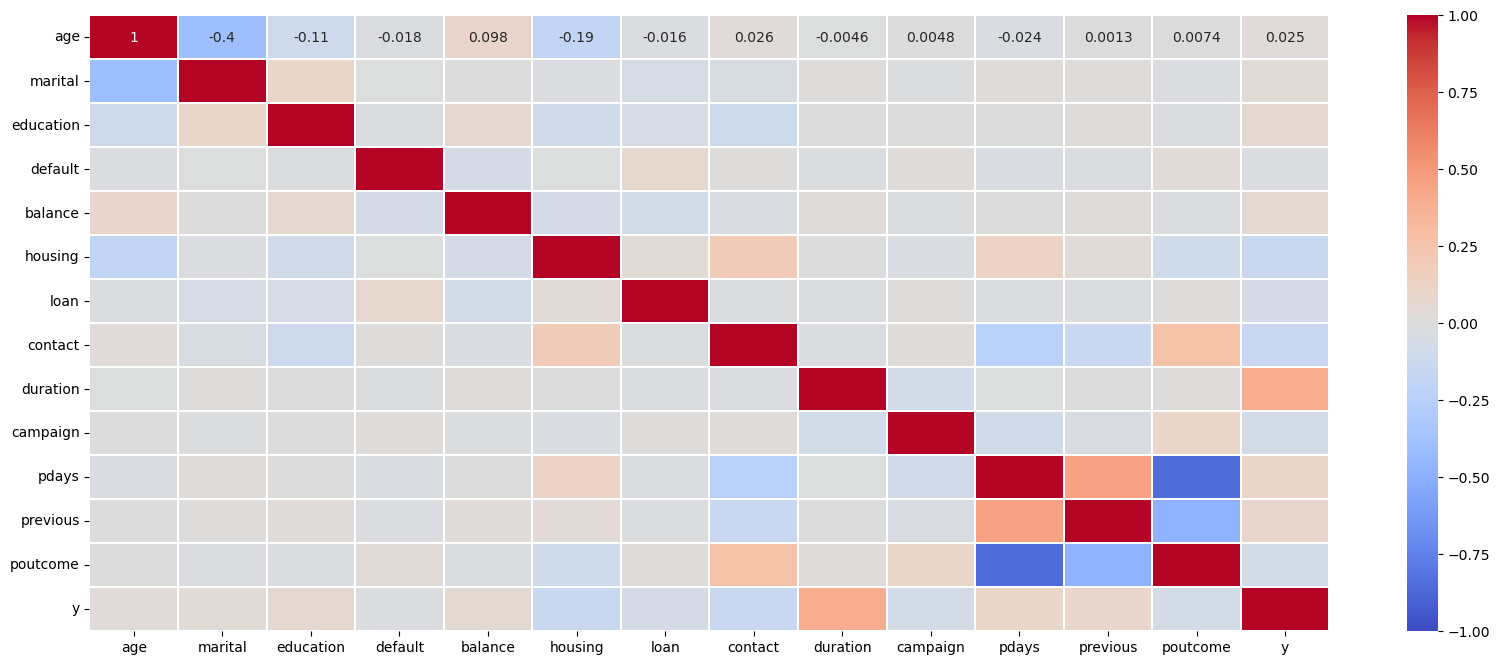

In [58]:
corrmatrix=data.corr()
#corrmatrix
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='coolwarm')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   marital    45211 non-null  int32
 2   education  45211 non-null  int32
 3   default    45211 non-null  int32
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int32
 6   loan       45211 non-null  int32
 7   contact    45211 non-null  int32
 8   duration   45211 non-null  int64
 9   campaign   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  poutcome   45211 non-null  int32
 13  y          45211 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.4 MB


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   marital    45211 non-null  int32
 2   education  45211 non-null  int32
 3   default    45211 non-null  int32
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int32
 6   loan       45211 non-null  int32
 7   contact    45211 non-null  int32
 8   duration   45211 non-null  int64
 9   campaign   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  poutcome   45211 non-null  int32
 13  y          45211 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.4 MB


In [61]:
y=data["y"]

In [62]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [63]:
x=data.drop(columns="y",axis=1)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   marital    45211 non-null  int32
 2   education  45211 non-null  int32
 3   default    45211 non-null  int32
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int32
 6   loan       45211 non-null  int32
 7   contact    45211 non-null  int32
 8   duration   45211 non-null  int64
 9   campaign   45211 non-null  int64
 10  pdays      45211 non-null  int64
 11  previous   45211 non-null  int64
 12  poutcome   45211 non-null  int32
 13  y          45211 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.4 MB


In [65]:
x

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,1,2,0,2143,1,0,2,261,1,-1,0,3
1,44,2,1,0,29,1,0,2,151,1,-1,0,3
2,33,1,1,0,2,1,1,2,76,1,-1,0,3
3,47,1,3,0,1506,1,0,2,92,1,-1,0,3
4,33,2,3,0,1,0,0,2,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,2,0,825,0,0,0,977,3,-1,0,3
45207,71,0,0,0,1729,0,0,0,456,2,-1,0,3
45208,72,1,1,0,5715,0,0,0,1127,5,184,3,2
45209,57,1,1,0,668,0,0,1,508,4,-1,0,3


In [66]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
normalisation = MinMaxScaler()
x_scaled_array=normalisation.fit_transform(x)
# Coverting to Dataframe
x=pd.DataFrame(x_scaled_array,columns=x.columns)
x.describe()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,0.583862,0.408271,0.018027,0.085171,0.555838,0.160226,0.320121,0.052494,0.028449,0.047245,0.002110,0.853325
std,0.137906,0.304115,0.249332,0.133049,0.027643,0.496878,0.366820,0.448975,0.052364,0.049968,0.114827,0.008376,0.329686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.500000,0.333333,0.000000,0.073457,0.000000,0.000000,0.000000,0.020943,0.000000,0.000000,0.000000,1.000000
50%,0.272727,0.500000,0.333333,0.000000,0.076871,1.000000,0.000000,0.000000,0.036600,0.016129,0.000000,0.000000,1.000000
75%,0.389610,1.000000,0.666667,0.000000,0.085768,1.000000,0.000000,1.000000,0.064864,0.032258,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Model bulding

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [70]:
##Decision tree model
Decisiontree_model=DecisionTreeClassifier()
Decisiontree_model.fit(x_train,y_train)
y_pred_DT=Decisiontree_model.predict(x_test)
accuracy_DT=accuracy_score(y_test,y_pred_DT)
precision_DT=precision_score(y_test,y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
f1_score_DT=f1_score(y_test,y_pred_DT)
y_pred_proba_DT = Decisiontree_model.predict_proba(x_test)[:, 1]
auc_roc_DT = roc_auc_score(y_test, y_pred_proba_DT)
print("accuracy:",accuracy_DT)
print("recall_value:",recall_DT)
print("precision value:",precision_DT)
print("f1score:",f1_score_DT)
print("auc_roc:",auc_roc_DT)


accuracy: 0.8628016085790885
recall_value: 0.4355300859598854
precision value: 0.41712403951701427
f1score: 0.42612839921502665
auc_roc: 0.6774614376668497


In [71]:
##Random forest model
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred_RF=RF_model.predict(x_test)
accuracy_RF=accuracy_score(y_test,y_pred_RF)
precision_RF=precision_score(y_test,y_pred_RF)
recall_RF=recall_score(y_test,y_pred_RF)
f1_score_RF=f1_score(y_test,y_pred_RF)
y_pred_proba_RF = RF_model.predict_proba(x_test)[:, 1]
auc_roc_RF = roc_auc_score(y_test, y_pred_proba_RF)
print("accuracy:",accuracy_RF)
print("recall:",recall_RF)
print("precision",precision_RF)
print("f1_score:",f1_score_RF)
print("auc_roc:",auc_roc_RF)


accuracy: 0.8990616621983915
recall: 0.39484240687679084
precision 0.6049165935030729
f1_score: 0.4778085991678225
auc_roc: 0.8928333487383308


In [72]:
svc_model=SVC(probability=True)
svc_model.fit(x_train,y_train)
y_pred_svc=svc_model.predict(x_test)
accuracy_svc=accuracy_score(y_test,y_pred_svc)
precision_svc=precision_score(y_test,y_pred_svc)
recall_svc=recall_score(y_test,y_pred_svc)
f1_score_svc=f1_score(y_test,y_pred_svc)
y_pred_svc=svc_model.predict_proba(x_test)[:,1]
auc_roc_svc=roc_auc_score(y_test,y_pred_svc)
print("accuracy:",accuracy_svc)
print("recall:",recall_svc)
print("precision",precision_svc)
print("f1_score:",f1_score_svc)
print("auc_roc:",auc_roc_svc)


accuracy: 0.8907506702412868
recall: 0.1644699140401146
precision 0.6252723311546841
f1_score: 0.2604355716878403
auc_roc: 0.8462314990512334


In [73]:
KN_model= KNeighborsClassifier()
KN_model.fit(x_train,y_train)
y_pred_KN=KN_model.predict(x_test)
accuracy_KN=accuracy_score(y_test,y_pred_KN)

precision_KN=precision_score(y_test,y_pred_KN)
recall_KN=recall_score(y_test,y_pred_KN)
f1_score_KN=f1_score(y_test,y_pred_KN)
y_pred_proba_KN = KN_model.predict_proba(x_test)[:, 1]
auc_roc_KN = roc_auc_score(y_test, y_pred_proba_KN)
print("accuracy:",accuracy_KN)
print("recall:",recall_KN)
print("precision",precision_KN)
print("f1_score:",f1_score_KN)
print("auc_roc:",auc_roc_KN)

accuracy: 0.8910857908847185
recall: 0.3375358166189112
precision 0.556710775047259
f1_score: 0.4202640028540849
auc_roc: 0.7980407670601284


In [74]:
accuracy_KN

0.8910857908847185

In [75]:
## oversampling data


In [76]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [77]:
from collections import Counter

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
sm=SMOTE(random_state=42)
x_sm_resampled,y_sm_resampled=sm.fit_resample(x_train,y_train)

In [80]:
y_sm_resampled.value_counts()

y
0    26747
1    26747
Name: count, dtype: int64

In [81]:
RF_model=RandomForestClassifier()
RF_model.fit(x_sm_resampled,y_sm_resampled)
y_pred_RF1=RF_model.predict(x_test)
accuracy_RF1=accuracy_score(y_test,y_pred_RF1)
precision_RF1=precision_score(y_test,y_pred_RF1)
recall_RF1=recall_score(y_test,y_pred_RF1)
f1_score_RF1=f1_score(y_test,y_pred_RF1)
y_pred_proba_RF1 = RF_model.predict_proba(x_test)[:, 1]
auc_roc_RF1 = roc_auc_score(y_test, y_pred_proba_RF1)
print("accuracy:",accuracy_RF1)
print("recall:",recall_RF1)
print("precision",precision_RF1)
print("f1_score:",f1_score_RF1)
print("auc_roc:",auc_roc_RF1)

accuracy: 0.874597855227882
recall: 0.6280802292263611
precision 0.4728213977566868
f1_score: 0.5395028304208713
auc_roc: 0.8912916383486569


In [82]:
svc_model = SVC(probability=True)
svc_model.fit(x_sm_resampled,y_sm_resampled)
y_pred_svc1=svc_model.predict(x_test)
accuracy_svc1=accuracy_score(y_test,y_pred_svc1)
precision_svc1=precision_score(y_test,y_pred_svc1)
recall_svc1=recall_score(y_test,y_pred_svc1)
f1_score_svc1=f1_score(y_test,y_pred_svc1)
y_pred_proba_svc1= svc_model.predict_proba(x_test)[:, 1]
auc_roc_svc1=roc_auc_score(y_test,y_pred_proba_svc1)
print("accuracy:",accuracy_svc1)
print("recall:",recall_svc1)
print("precision",precision_svc1)
print("f1_score:",f1_score_svc1)
print("auc_roc:",auc_roc_svc1)

accuracy: 0.8180965147453083
recall: 0.805730659025788
precision 0.37185929648241206
f1_score: 0.5088671733622874
auc_roc: 0.8907825992398992


In [83]:
KN_model.fit(x_sm_resampled,y_sm_resampled)
y_pred_KN1=KN_model.predict(x_test)
y_pred_proba_KN1 = KN_model.predict_proba(x_test)[:, 1]
accuracy_KN1=accuracy_score(y_test,y_pred_KN1)
precision_KN1=precision_score(y_test,y_pred_KN1)
recall_KN1=recall_score(y_test,y_pred_KN1)
f1_score_KN1=f1_score(y_test,y_pred_KN1)
auc_roc_KN1=roc_auc_score(y_test,y_pred_proba_KN1)
print("accuracy:",accuracy_KN1)
print("recall:",recall_KN1)
print("precision",precision_KN1)
print("f1_score:",f1_score_KN1)
print("auc_roc:",auc_roc_KN1)

accuracy: 0.8130697050938338
recall: 0.6888252148997135
precision 0.3486078886310905
f1_score: 0.4629308684767957
auc_roc: 0.8057385101373946


In [84]:
x.shape

(45211, 13)

In [85]:
x_train.shape

(30291, 13)

In [86]:
x_test.shape

(14920, 13)

In [87]:
y_train.shape

(30291,)

In [88]:
y_test.shape

(14920,)

In [89]:
x_sm_resampled.shape

(53494, 13)

In [90]:
y_sm_resampled.shape

(53494,)

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [92]:
random_search.fit(x_train, y_train)
best_random_forest_model = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [96]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Predict the output for the unseen test data
y_pred_test = best_random_forest_model.predict(x_test)

In [97]:
accuracy_RFCV =accuracy_score(y_test,y_pred_test)

In [98]:
precision_RFCV=precision_score(y_test,y_pred_test)
recall_RFCV=recall_score(y_test,y_pred_test)
f1_score_RFCV=f1_score(y_test,y_pred_test)
y_pred_proba_test = best_random_forest_model.predict_proba(x_test)[:, 1]
auc_roc_RFCV=roc_auc_score(y_test,y_pred_proba_test)

In [99]:
random_search.fit(x_sm_resampled,y_sm_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [101]:
best_random_forest_model1 = random_search.best_estimator_

In [102]:
y_pred_test1 =best_random_forest_model1.predict(x_test)

In [105]:
accuracy_randomized_cv1 =accuracy_score(y_test,y_pred_test1)
precision_RFCV1=precision_score(y_test,y_pred_test1)
recall_RFCV1=recall_score(y_test,y_pred_test1)
f1_score_RFCV1=f1_score(y_test,y_pred_test1)
y_pred_proba_test1 = best_random_forest_model1.predict_proba(x_test)[:, 1]
auc_roc_RFCv1=roc_auc_score(y_test,y_pred_test1)

In [106]:
print(accuracy_randomized_cv1)

0.8752680965147454


In [107]:
print(auc_roc_RFCv1)

0.7640665930851498


In [108]:
print("accuracy:",accuracy_RFCV)
print("recall:",precision_RFCV)
print("precision",recall_RFCV)
print("f1_score:",f1_score_RFCV)
print("auc_roc:",auc_roc_RFCV)

accuracy: 0.900804289544236
recall: 0.631578947368421
precision 0.36446991404011464
f1_score: 0.4622093023255814
auc_roc: 0.9037732964338338


In [110]:
## selecting best features out there.
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)
K = 3
selector = SelectKBest(score_func=f_classif, k=K) 
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)
selected_features = x_train.columns[selector.get_support()].tolist()
print(f"Selected Features: {selected_features}")
#handling imbalanced data
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train_selected, y_train)
model = RandomForestClassifier(random_state=42)
model.fit(x_train_res, y_train_res)
y_pred = model.predict(x_test_selected)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Selected Features: ['housing', 'contact', 'duration']

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     13175
           1       0.31      0.53      0.39      1745

    accuracy                           0.81     14920
   macro avg       0.62      0.69      0.64     14920
weighted avg       0.86      0.81      0.83     14920



In [113]:
accuracy_model=accuracy_score(y_test,y_pred)
precision_model=precision_score(y_test,y_pred)
recall_model = recall_score(y_test, y_pred)
f1_score_model=f1_score(y_test,y_pred)
y_pred_proba_model = model.predict_proba(x_test_selected)[:, 1]
auc_roc_model = roc_auc_score(y_test, y_pred_proba_model)
print("accuracy:",accuracy_model)
print("recall_value:",recall_model)
print("precision value:",precision_model)
print("f1score:",f1_score_model)
print("auc_roc:",auc_roc_model)

accuracy: 0.8094504021447722
recall_value: 0.5289398280802292
precision value: 0.31351902173913043
f1score: 0.3936873533802516
auc_roc: 0.7988793788705055
